In [1]:
import numpy as np
import matplotlib.pyplot as plt

# training related

#### > Accuracy Score
- Regression 類型的看 R square
- Classification 類型則看正確的百分比

#### > Overfitting / Underfitting

#### > Cross Validation

#### > Hyperparameters Tuning
- read docs
- Grid Search
- Random Search

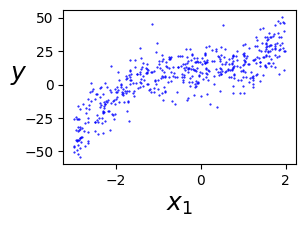

In [12]:
np.random.seed(1)

m = 500
x1 = 5 * np.random.rand(m, 1) - 3
y = 10 + (2 * x1) + x1 **2 + 2 * x1**3 + 10 * np.random.randn(m, 1)

plt.figure(figsize=(3, 2))
plt.plot(x1, y, "b.", markersize=1)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [11]:
x1[:5], y[:5]

(array([[-0.91488998],
        [ 0.60162247],
        [-2.99942813],
        [-1.48833714],
        [-2.26622055]]),
 array([[  6.31582273],
        [ 10.24611886],
        [-50.31055841],
        [ -2.68550248],
        [-26.93974928]]))

# train_test_split

In [9]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=1)

x1_train.shape, x1_test.shape, y_train.shape, y_test.shape

((400, 1), (100, 1), (400, 1), (100, 1))

# Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor

In [16]:
pip_reg = Pipeline([
  ("poly", PolynomialFeatures(include_bias=False)),
  ("scal", StandardScaler()),
  ("sgd", SGDRegressor(penalty='elasticnet', random_state=1))
])

pip_reg

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('sgd', SGDRegressor(penalty='elasticnet', random_state=1))])

# Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = [
  {
    'poly__degree': [2, 3, 4],
    'sgd__alpha': [0.1, 1, 10],
    'sgd__l1_ratio': [0, 0.5, 1]
  }
]

In [19]:
grid_search = GridSearchCV(
  pip_reg,
  param_grid,
  scoring='r2',
  return_train_score=True,
  cv=3,
)

grid_search.fit(x1_train, y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scal', StandardScaler()),
                                       ('sgd',
                                        SGDRegressor(penalty='elasticnet',
                                                     random_state=1))]),
             param_grid=[{'poly__degree': [2, 3, 4], 'sgd__alpha': [0.1, 1, 10],
                          'sgd__l1_ratio': [0, 0.5, 1]}],
             return_train_score=True, scoring='r2')

In [20]:
grid_search.best_score_

0.7329379166794471

In [21]:
grid_search.best_params_

{'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}

In [22]:
grid_model = grid_search.best_estimator_

grid_model.score(x1_test, y_test)

0.7287417714648952

In [24]:
grid_rlt = grid_search.cv_results_

for mean_score, params in zip(grid_rlt['mean_test_score'], grid_rlt['params']):
  print(mean_score, params)

0.6709144714185259 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0}
0.6729631263131383 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0.5}
0.6739838341338239 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}
0.5604173544087145 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 0}
0.6191871577349027 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 0.5}
0.6703784468578063 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 1}
0.14710596880018803 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 0}
0.17066184581085764 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 0.5}
0.35965297018820436 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 1}
0.724812436785547 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0}
0.7292732003307676 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0.5}
0.7329379166794471 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}
0.6498673294136279 {'poly__degree': 3, 'sgd__alpha': 1, 'sgd__l

In [28]:
import pandas as pd

pd.DataFrame(grid_rlt)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_sgd__alpha,param_sgd__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001617,0.000136,0.000452,3.226167e-05,2,0.1,0,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.681827,0.620079,0.710837,0.670914,0.037847,13,0.677307,0.708229,0.655283,0.680273,0.021717
1,0.001359,0.000087,0.000425,2.931159e-05,2,0.1,0.5,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.685450,0.619078,0.714362,0.672963,0.039889,12,0.679451,0.710540,0.657430,0.682474,0.021787
2,0.001598,0.000167,0.000488,8.795768e-05,2,0.1,1,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.688785,0.616186,0.716980,0.673984,0.042459,11,0.680708,0.711576,0.658440,0.683575,0.021787
3,0.001088,0.000147,0.000351,6.245060e-05,2,1,0,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.557087,0.541118,0.583047,0.560417,0.017278,18,0.567911,0.600991,0.548605,0.572502,0.021632
4,0.001013,0.000181,0.000376,8.257004e-05,2,1,0.5,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.623108,0.588549,0.645905,0.619187,0.023579,17,0.628831,0.657883,0.602874,0.629863,0.022469
5,0.001202,0.000098,0.000320,3.832405e-05,2,1,1,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.682686,0.618728,0.709721,0.670378,0.038153,14,0.677798,0.709030,0.654674,0.680501,0.022273
6,0.000742,0.000035,0.000256,1.755613e-06,2,10,0,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.134789,0.179652,0.126876,0.147106,0.023239,27,0.160548,0.201993,0.153779,0.172107,0.021313
7,0.000716,0.000018,0.000256,2.170642e-06,2,10,0.5,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.157878,0.208528,0.145580,0.170662,0.027242,26,0.183041,0.232322,0.171025,0.195463,0.026521
8,0.001141,0.000142,0.000373,1.849277e-05,2,10,1,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.360628,0.406270,0.312062,0.359653,0.038466,21,0.377901,0.438099,0.328350,0.381450,0.044875
9,0.001029,0.000106,0.000265,2.247832e-07,3,0.1,0,"{'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l...",0.735321,0.667060,0.772056,0.724812,0.043504,8,0.734500,0.764145,0.705448,0.734697,0.023963


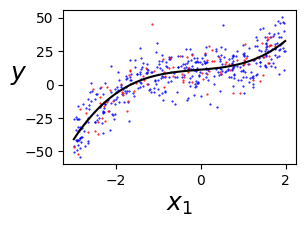

In [34]:
plt.figure(figsize=(3, 2))

x1s = np.linspace(x1.min(), x1.max(), 100).reshape(-1, 1)
y_pred = grid_model.predict(x1s)

plt.plot(x1_train, y_train, "b.", markersize=1)
plt.plot(x1_test, y_test, "r.", markersize=1)
plt.plot(x1s, y_pred, "k-")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

<!-- # Random Search -->

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
param_random = [
  {
    'poly__degree': range(1, 11, 1),
    'sgd__alpha': np.random.rand(100), # 0~1抽100個
    'sgd__l1_ratio': np.random.rand(100)
  }
]

In [36]:
rnd_search = RandomizedSearchCV(
  pip_reg,
  param_distributions=param_random,
  n_iter=10,
  cv=3,
  scoring='r2',
  return_train_score=True,
  random_state=1
)

rnd_search.fit(x1_train, y_train.ravel())

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scal', StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=1))]),
                   param_distributions=[{'poly__degree': range(1, 11),
                                         'sgd__alpha': array([0.72130334, 0.44034709, 0.12673571, 0.58982365, 0.03606831,
       0.20018212, 0.78830119, 0.01209676, 0.3033456...
       3.47369420e-01, 7.80224580e-01, 5.46454591e-01, 8.16442398e-01,
       4.83726951e-01, 5.89951298e-01, 7.87263448e-01, 1.00234643e-01,
       5.37007117e-01, 3.65983347e-01, 6.04306844e-01, 9.58802516e-01,
       3.92822945e-01, 3.92972998e-01, 7.90636994e-01, 6.45078399e-01,
       3.93884008e-01, 6.88955048e-01, 4.04001609e-01, 1.36113154e-01])}],
                   random_state=1, return_train_score=True, scoring='r2')

In [37]:
rnd_search.best_score_

0.7296834716153899

In [39]:
rnd_search.best_params_

{'sgd__l1_ratio': 0.9247408135383717,
 'sgd__alpha': 0.151375569992799,
 'poly__degree': 10}

In [41]:
rnd_search.best_estimator_.score(x1_test, y_test)

0.7200654565989044

In [44]:
rnd_rlt = rnd_search.cv_results_
for mean_score, params in zip(rnd_rlt['mean_test_score'], rnd_rlt['params']):
  print(mean_score, params)

0.7296834716153899 {'sgd__l1_ratio': 0.9247408135383717, 'sgd__alpha': 0.151375569992799, 'poly__degree': 10}
0.7047624269309748 {'sgd__l1_ratio': 0.3948822625368005, 'sgd__alpha': 0.6830743663365642, 'poly__degree': 8}
0.6016866738089531 {'sgd__l1_ratio': 0.39282294499696246, 'sgd__alpha': 0.3734071317371953, 'poly__degree': 1}
0.683140200789267 {'sgd__l1_ratio': 0.19086994317230743, 'sgd__alpha': 0.8785878632047704, 'poly__degree': 10}
0.7245078307345749 {'sgd__l1_ratio': 0.8805385975643267, 'sgd__alpha': 0.7213033441865708, 'poly__degree': 6}
0.723177968321603 {'sgd__l1_ratio': 0.8369977822135122, 'sgd__alpha': 0.7043133983839096, 'poly__degree': 8}
0.7065412580554392 {'sgd__l1_ratio': 0.38698923425629217, 'sgd__alpha': 0.5071194235482045, 'poly__degree': 3}
0.7124785922478898 {'sgd__l1_ratio': 0.11819262934703845, 'sgd__alpha': 0.34433919545005387, 'poly__degree': 10}
0.6948355706554746 {'sgd__l1_ratio': 0.46157971096238615, 'sgd__alpha': 0.7883011896679689, 'poly__degree': 3}
0.70

In [43]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgd__l1_ratio,param_sgd__alpha,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001923,0.000241,0.000409,0.000046,0.924741,0.151376,10,"{'sgd__l1_ratio': 0.9247408135383717, 'sgd__al...",0.736680,0.668379,0.783992,0.729683,0.047457,1,0.742149,0.771768,0.710103,0.741340,0.025181
1,0.001093,0.000059,0.000325,0.000039,0.394882,0.683074,8,"{'sgd__l1_ratio': 0.3948822625368005, 'sgd__al...",0.702719,0.651684,0.759884,0.704762,0.044196,6,0.717668,0.743996,0.685223,0.715629,0.024037
2,0.000847,0.000045,0.000293,0.000026,0.392823,0.373407,1,"{'sgd__l1_ratio': 0.39282294499696246, 'sgd__a...",0.611629,0.564682,0.628749,0.601687,0.027084,10,0.613060,0.647550,0.586531,0.615714,0.024981
3,0.001098,0.000109,0.000305,0.000015,0.19087,0.878588,10,"{'sgd__l1_ratio': 0.19086994317230743, 'sgd__a...",0.679940,0.627216,0.742265,0.683140,0.047023,9,0.698381,0.719237,0.665087,0.694235,0.022300
4,0.001128,0.000110,0.000282,0.000009,0.880539,0.721303,6,"{'sgd__l1_ratio': 0.8805385975643267, 'sgd__al...",0.727880,0.668703,0.776941,0.724508,0.044252,2,0.735256,0.764968,0.704224,0.734816,0.024800
5,0.001118,0.000162,0.000302,0.000028,0.836998,0.704313,8,"{'sgd__l1_ratio': 0.8369977822135122, 'sgd__al...",0.727322,0.666147,0.776065,0.723178,0.044970,3,0.735984,0.762559,0.702350,0.733631,0.024636
6,0.000899,0.000021,0.000273,0.000008,0.386989,0.507119,3,"{'sgd__l1_ratio': 0.38698923425629217, 'sgd__a...",0.712971,0.655746,0.750907,0.706541,0.039115,5,0.715473,0.743042,0.688767,0.715761,0.022159
7,0.000960,0.000056,0.000284,0.000003,0.118193,0.344339,10,"{'sgd__l1_ratio': 0.11819262934703845, 'sgd__a...",0.711691,0.657671,0.768073,0.712479,0.045075,4,0.725235,0.752560,0.693441,0.723745,0.024158
8,0.000865,0.000055,0.000279,0.000021,0.46158,0.788301,3,"{'sgd__l1_ratio': 0.46157971096238615, 'sgd__a...",0.700082,0.647084,0.737340,0.694836,0.037033,8,0.704556,0.730743,0.677295,0.704198,0.021821
9,0.000907,0.000030,0.000282,0.000003,0.074574,0.589923,5,"{'sgd__l1_ratio': 0.07457407125147986, 'sgd__a...",0.701490,0.649584,0.751331,0.700802,0.041541,7,0.713289,0.737482,0.681400,0.710724,0.022967
